## Binary Trees

A binary tree is a special type of a tree data structure, where every node can have at most 2 children (ie every node can have either 0, 1 or 2 children, not more than 2)

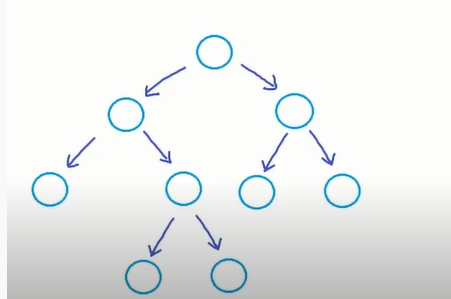


is a binary tree

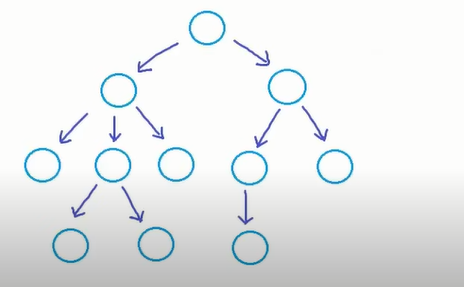 

is not as one node has > 2 elements

### Types of binary trees

1) Complete binary trees - We have already looked at this in the context of heaps which are complete binary trees. A binary tree of height h where all elements except the last level are completely filled, and the last level has elements filled in from the left is a complete binary tree


In other words, if you have an array representation of a binary tree, there should be no blanks


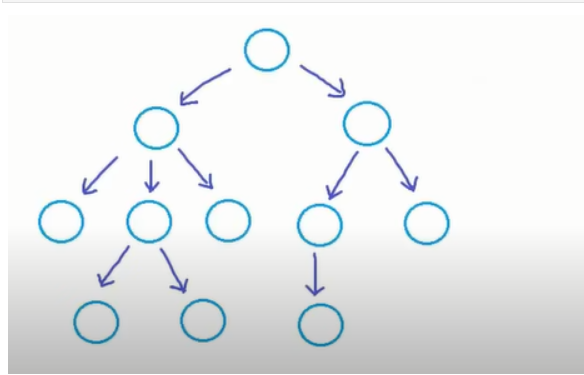

is NOT a complete binary tree, as in the last level, the first two left most elements are blank


2) Balanced binary tree - For each node, difference between height of left and right subtree is at max k

2 Binary search trees (BST) - A special type of binary tree, where at every node, all elements in the left sub tree of the node are <= the node, and all elements in the right sub tree are > the node

Here is an example of a binary search tree

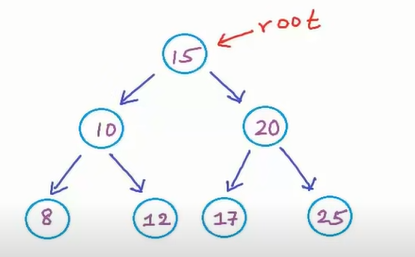

3 Fully filled binary tree or a perfect binary tree, where the tree has the maximum possible elements at every level

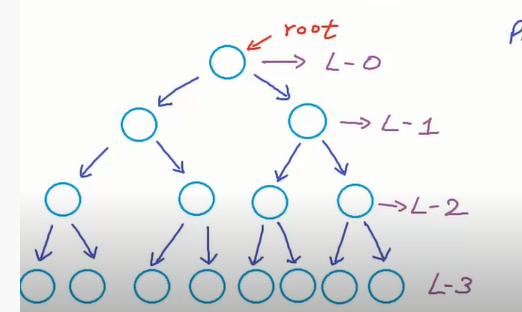



## Some properties of binary trees

1) if n total elements, Depth/Height of a tree in worse case is n-1 if every node has only one child. Note that this architecture is conceptually equivalent to a linked list
2) In best case, height of a tree is log(n). This happens in case of a complete binary tree

This is because number of elements at level i (starting with i=0 which is the root) is 2**i

Therefore, total number of elements in a perfect binary tree = 2^0 + 2^1...2^h 
= 2^(h+1) - 1

n = 2**(h+1) - 1
=> h = log2(n+1) - 1


For a complete binary tree, h = [log2(n)]
3) Definition : Height of tree with just one node is defined as 0, height of empty tree is -1

4) In a binary tree with n nodes, and e edges, e = n-1 (this is because all nodes except the root node have one incoming node)

## Implementation of binary trees

Binary trees can be implemented in 2 ways - 
1) dynamically created nodes, where every node has 3 parts, a value, a reference to th left node and a reference to the right mnode
2) Array representation. This is possible ONLY FOR A COMPLETE BINARY TREE. because there is a deterministic relation in terms of index between parent and child. We saw this in heaps too 

http://localhost:8888/lab/tree/Algorithms-and-DS/concepts/heaps.ipynb

Given index i of parent, assuming root node starts at 0, left and right child are at 2*i+1 and 2*i +2 . or equivalently, assuming root node starts at 1, left and right child are at 2*i and 2*i + 1

In [2]:
## Python implentation of binary tree

In [3]:
class BinaryTreeNode(object):
    
    def __init__(self, value):
        self.value = value
        self.left = None ## pointer to left sub tree
        self.right = None ## pointer to right sub tree
        

If you want to create a tree which looks like this : 

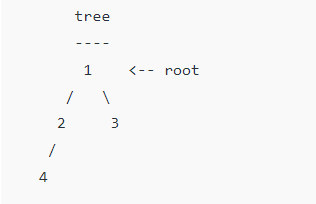

In [59]:
root = BinaryTreeNode(1)
root.left = BinaryTreeNode(2)
root.right = BinaryTreeNode(3)
root.left.left = BinaryTreeNode(4)

In [15]:
root

## Traversal of binary trees

Unlike arrays , stacks, queues or linked lists which are linear data structures (which means order of visiting elements is unique), binary trees are non-linear data structures, so there can be multiple ways of visiting elements 

A traversal is an algorithm to visit every element exactly once in a deterministic way in a tree.

There are many different ways to do a traversal

There are two broad categories. For illustration, we shall use the tree below
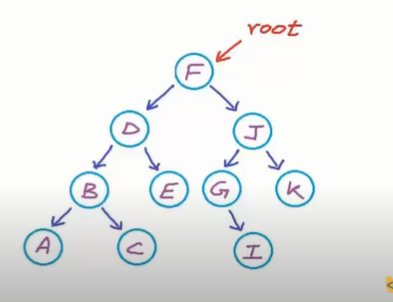




In [63]:
tre = BinaryTreeNode('F')
tre.left = BinaryTreeNode('D')
tre.right = BinaryTreeNode('J')
tre.left.left = BinaryTreeNode('B')
tre.left.right = BinaryTreeNode('E')
tre.left.left.left = BinaryTreeNode('A')
tre.left.left.right = BinaryTreeNode('C')
tre.right.left = BinaryTreeNode('G')
tre.right.left.right = BinaryTreeNode('I')
tre.right.right = BinaryTreeNode('K')

1) Breadth first : Where at every level, siblings are visited before visiting children. A example algorithm is level order traversal

In the tree above, it means visiting in order F,D,J,B,E,G,K,A,C,I ie from root all elements in same level are first visited before visiting children

2) Depth first : For every node, children of node and the node itself are visited before visiting siblings

For a binary tree , for every node, there are 6 permutations for visiting the left subtree (L), the node itself (N) and the right subtree (R)

NLR
LNR
LRN

NRL
RNL
RLN

By convention, out of these 6 posibilities, we always want to visit the left before right
Therefore, only 3 possibilities remain

NLR - This is called preorder traversal (pre because Node is visited before L and R)
LNR - Inorder traversal (in because Node is visited between L and R)
LRN - Post order traversal (because Node is visited after L and R)

One additional note : For a binary search tree , in order traversal yields elements in a sorted order

Order Complexity

All are O(n) time complexity since all nodes are visited
For level order, space complexity in worse case is O(n) - since in the queue, all elements in


In [ ]:
# implementation - pre, in , post, level traversal

In [57]:
def preorder_traversal(root):
    if root is None:
        return
    print(root.value)
    preorder_traversal(root.left)
    preorder_traversal(root.right)

In [61]:
def inorder_traversal(root):
    if root is None:
        return
    
    inorder_traversal(root.left)
    print(root.value)
    inorder_traversal(root.right)

In [67]:
def postorder_traversal(root):
    if root is None:
        return
    
    postorder_traversal(root.left)
    
    postorder_traversal(root.right)
    print(root.value)

In [81]:
from collections import deque
q = deque()

def levelorder_traversal(root):
    if root is None:
        return
    q.append(root)
    while len(q)>0:
        out = q.popleft()
        print(out.value)
        if out.left is not None:
            q.append(out.left)
        if out.right is not None:
            q.append(out.right)
    return
        
    

In [71]:
q.append(1)

In [73]:
a = q.pop()

In [75]:
len(q)

0

In [64]:
preorder_traversal(tre)

F
D
B
A
C
E
J
G
I
K


In [80]:
inorder_traversal(tre)

A
B
C
D
E
F
G
I
J
K


In [68]:
postorder_traversal(tre)

A
C
B
E
D
I
G
K
J
F


In [82]:
levelorder_traversal(tre)

F
D
J
B
E
G
K
A
C
I


## Height of a binary tree

Recursive algorithm : height is the max of the height of the left subtree and height of 
right sub tree + 1

If node with no children is taken as height 0, empty node will be of height -1, and height of tree is number of edges in the path from root to lowermost leaf (which is no of nodes including root and lower most leaf - 1)

If , on the other hand, the convention is - node with no children is taken as height 1, empty node will be of height 0, height of tree is no of nodes including root and lower most leaf


In [18]:
def height_bt(node):
    if node is None:
        return 0 ## can be either 0 or -1 depending on definition if there is no tree
    else:
        height = max(height_bt(node.left), height_bt(node.right)) + 1
        return height

## Calculate diameter of a binary tree

Diameter is the longest path (number of edges) between 2 leaf nodes in a tree, which may or may not pass through the root.

The brute force way, which is O(n^2), is - for every node in tree, calculate  height of left subtree (with convention that empty node is -1), height of right subtree, and add 2 (for connection between node and left subtree, and node and right subtree)

This gives diameter at that node

Repeat for every node in the tree, take the max, that will give you the diameter
This however is O(n^2) and repeats a lot of operations - for example : finding height at root node has certain counts which are repeated when you take height at a sub node


Better O(n) solution. in a recursive way, start from bottom (leaf) and store the height values thus computed when calculating heights of nodes higher in the tree. So there's no need to revisit nodes

In [21]:
def height_diam(node, max_diameter):
    if node is None:
        return -1, 0
    height_left, max_d_left = height_diam(node.left, max_diameter)
    height_right, max_d_right = height_diam(node.right, max_diameter)
    h = max(height_left, height_right) + 1
    d = height_left + height_right + 2
    return h, max(d,max(max_d_left, max_d_right))


def diameter(node):
    max_diameter = 0
    if node is None:
        return 0
    
    height, max_diameter = height_diam(node, max_diameter)
    return max_diameter
    

In [36]:
def diameter_2(node):
    max_diameter = [0] ## global variable has to be a list, not a constant, as otherwise closure (the inside function) won't recognize it
    def traverse(node):
        if node is None:
            return -1
        left = traverse(node.left)
        right = traverse(node.right)
        h = max(left,right) + 1
        d = left + right + 2
        max_diameter[0] = max(max_diameter[0], d)
        return h
    traverse(node)
    return max_diameter[0]

In [37]:
diameter_2(node)

3

In [42]:
## Invert a binary tree (ie take mirror image around vertical axis) and return root

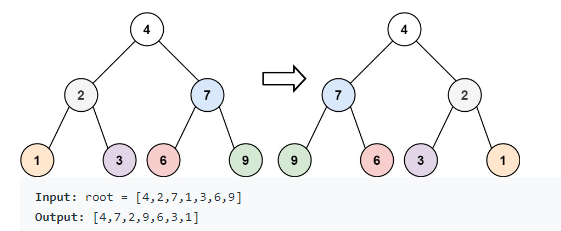

Solution : For every node, swap left and right subtree till you reach leaf

In [44]:
def invert_tree(node):
    if node is None:
        return None
    temp = node.right
    node.right = node.left
    node.left = temp
    invert_tree(node.left)
    invert_tree(node.right)
    
    return node

In [45]:
invert_tree(node)

In [46]:
node.left.value

3

In [47]:
root = BinaryTreeNode(1)
root.left = BinaryTreeNode(2)
root.right = BinaryTreeNode(3)
root.left.left = BinaryTreeNode(4)

In [48]:
output = invert_tree(root)

In [53]:
output.right.left.value

AttributeError: 'NoneType' object has no attribute 'value'